In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Global import
!pip install mlrose-hiive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 535.1 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=98351 sha256=579d2540cb62304feb453402048d5e21b3422caddfaea61f65187a5096611f4b
  Stored in directory: /root/.cache/pip/wheels/ca/9c/44/36113054dda94da67040173c2a475dbfb6980c2c6ddf5747b1
Successfully built mlrose-hiive


In [3]:
# Section A
# 1. Optimization problem: Travelling salesperson problem
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [4]:
# 1.1 Define a fitness function object

# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):
    # Initialize counter
    fitness_cnt = 0

    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):

            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):
                # If no attacks, then increment counter
                fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

In [5]:
# 1.2 Define an optimization problem object

# Define optimization problem object
problem_fit = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = False, max_val = 8)

In [19]:
# 1.3 Select and run a randomized optimization algo (in the order of RHC, SA, GA, MIMC)

max_iters_array = np.arange(1000, 100000, 1000)
fitness_score_algo_array = [[], [], [], []]
wall_clock_time_algo_array = [[], [], [], []]
fitness_curve_algo_array_300 = []
algo_func_array = [mlrose.random_hill_climb, mlrose.simulated_annealing, mlrose.genetic_alg, mlrose.mimic]

for cur_iter in max_iters_array:
    for i in range(len(algo_func_array)):
        startTime = time.time()
        best_state, best_fitness, fitness_curve = algo_func_array[i](problem_fit,
                                                      max_attempts = 100, random_state = 2, 
                                                      curve = True, max_iters = cur_iter.item())
        endTime = time.time()
        fitness_score_algo_array[i].append(best_fitness)
        wall_clock_time_algo_array[i].append(endTime - startTime)
        print(cur_iter, i, best_fitness)
        print(best_state)
        print("____________")
        
print("aa")

1000 0 0.0
[3 3 3 3 3 3 3 3]
____________
1000 1 0.0
[7 6 5 4 3 2 1 0]
____________
1000 2 0.0
[3 3 3 3 3 3 3 3]
____________
1000 3 6.0
[0 2 2 2 2 2 2 2]
____________
2000 0 0.0
[3 3 3 3 3 3 3 3]
____________
2000 1 0.0
[7 6 5 4 3 2 1 0]
____________
2000 2 0.0
[3 3 3 3 3 3 3 3]
____________
2000 3 6.0
[0 2 2 2 2 2 2 2]
____________
3000 0 0.0
[3 3 3 3 3 3 3 3]
____________
3000 1 0.0
[7 6 5 4 3 2 1 0]
____________
3000 2 0.0
[3 3 3 3 3 3 3 3]
____________
3000 3 6.0
[0 2 2 2 2 2 2 2]
____________
4000 0 0.0
[3 3 3 3 3 3 3 3]
____________
4000 1 0.0
[7 6 5 4 3 2 1 0]
____________
4000 2 0.0
[3 3 3 3 3 3 3 3]
____________
4000 3 6.0
[0 2 2 2 2 2 2 2]
____________
5000 0 0.0
[3 3 3 3 3 3 3 3]
____________
5000 1 0.0
[7 6 5 4 3 2 1 0]
____________
5000 2 0.0
[3 3 3 3 3 3 3 3]
____________
5000 3 6.0
[0 2 2 2 2 2 2 2]
____________
6000 0 0.0
[3 3 3 3 3 3 3 3]
____________
6000 1 0.0
[7 6 5 4 3 2 1 0]
____________
6000 2 0.0
[3 3 3 3 3 3 3 3]
____________
6000 3 6.0
[0 2 2 2 2 2 2 2]
_____

In [20]:
# 1.4 plot

def plotAgainstIteration(x, y, xLabel, yLabel, fileName):
    plt.plot(x, y[0], 'b', label='RHC')
    plt.plot(x, y[1], 'g', label='SA', linestyle="--")
    plt.plot(x, y[2], 'r', label='GA')
    plt.plot(x, y[3], 'm', label='MIMC', linestyle="--")
    plt.legend()
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.savefig(fileName)
    plt.show()

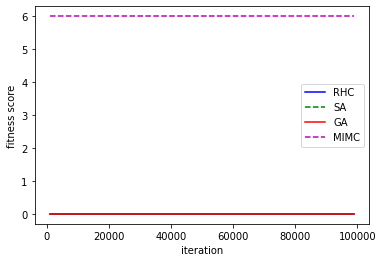

In [21]:
# plot fitness score vs iterations
plotAgainstIteration(max_iters_array, fitness_score_algo_array, "iteration", "fitness score", "TSP_4_search_algo_with_their_fitness_score_vs_iterations")

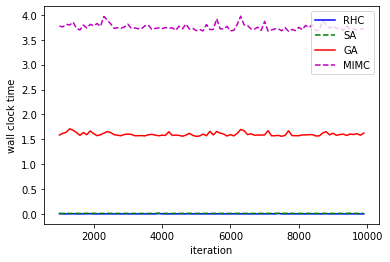

In [18]:
# plot wall clock time vs iteration
plotAgainstIteration(max_iters_array, wall_clock_time_algo_array, "iteration", "wall clock time", "TSP_4_search_algo_with_their_wall_clock_time_vs_iterations")

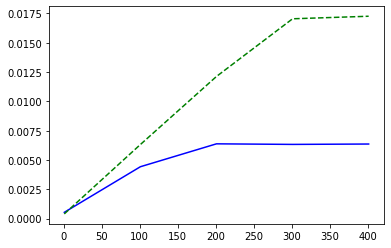

In [33]:
plt.plot(max_iters_array, wall_clock_time_algo_array[0], 'b', label='RHC')
plt.plot(max_iters_array, wall_clock_time_algo_array[1], 'g', label='SA', linestyle="--")

In [34]:
# problem size
# 全部重走一遍？！！
wall_clock_time_with_sizes_array = []
fitness_score_with_sizes_array = []
function_evaluation_with_sizes_array = []
sizes = [8, 16, 32, 48, 64, 80]

for i in range(len(algo_func_array)):
    cur_algo_clock_time = []
    cur_fitness_score = []
    function_evaluation = []
    for j in range(len(sizes)):
        problem_fit = mlrose.DiscreteOpt(length = sizes[j], fitness_fn = fitness_cust, maximize = False, max_val = 8)
        startTime = time.time()
        best_state, best_fitness, fitness_curve = algo_func_array[i](problem_fit,
                                                          max_attempts = 100, random_state = 2, 
                                                          curve = True, max_iters = 200)
        endTime = time.time()
        cur_algo_clock_time.append(endTime - startTime)
        cur_fitness_score.append(fitness_curve[:,0][-1])
        function_evaluation.append(fitness_curve[:,1][-1])
        
    wall_clock_time_with_sizes_array.append(cur_algo_clock_time)
    fitness_score_with_sizes_array.append(cur_fitness_score)
    function_evaluation_with_sizes_array.append(function_evaluation)

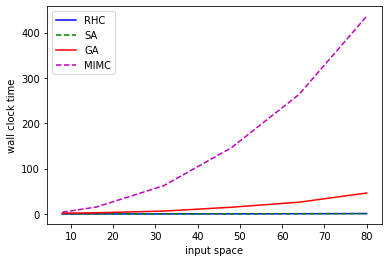

In [35]:
# plot wall clock time vs input size
plotAgainstIteration(sizes, wall_clock_time_with_sizes_array, "input space", "wall clock time", "TSP_4_search_algo_with_their_wall_clock_time_vs_input_space")


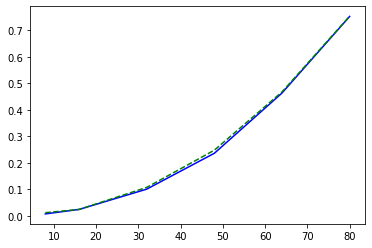

In [36]:
plt.plot(sizes, wall_clock_time_with_sizes_array[0], 'b', label='RHC')
plt.plot(sizes, wall_clock_time_with_sizes_array[1], 'g', label='SA', linestyle="--")

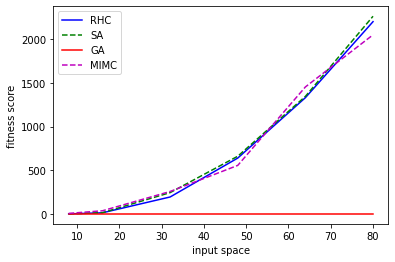

In [37]:
# plot fitness score vs input size
plotAgainstIteration(sizes, fitness_score_with_sizes_array, "input space", "fitness score", "TSP_4_search_algo_with_their_fitness_score_vs_input_space")


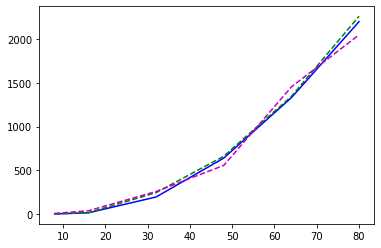

In [38]:
plt.plot(sizes, fitness_score_with_sizes_array[0], 'b', label='RHC')
plt.plot(sizes, fitness_score_with_sizes_array[1], 'g', label='SA', linestyle="--")
plt.plot(sizes, fitness_score_with_sizes_array[3], 'm', label='MIMC', linestyle="--")

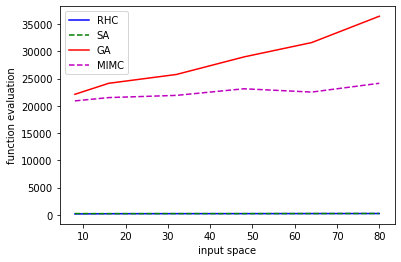

In [39]:
# plot function evaluation vs input size
plotAgainstIteration(sizes, function_evaluation_with_sizes_array, "input space", "function evaluation", "TSP_4_search_algo_with_their_function_evaluation_vs_input_space")


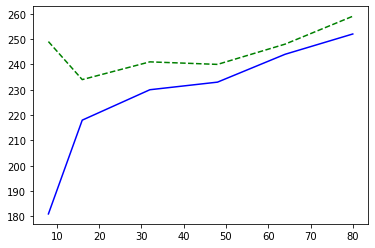

In [40]:
plt.plot(sizes, function_evaluation_with_sizes_array[0], 'b', label='RHC')
plt.plot(sizes, function_evaluation_with_sizes_array[1], 'g', label='SA', linestyle="--")